In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
#import hvplot.xarray  # Make sure to install hvplot library if you haven't (e.g., pip install hvplot)
# Step 1: Read NetCDF file
file_path = "tasmax_day_GERICS-REMO2009.v1_historical-rcp85_MIROC-MIROC5.r1i1p1_AFR-44_19510101-20991231_bc_qdm_comp.nc"
ds = xr.open_dataset(file_path)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Climate data analyses as part of the Ecosystems Based Adaptation
Here, we plot the model temperature data to understnd spatial extent during the breeding season of Honblills as part of the ongoing research at SANBI kirstenbosch Research Centre

code Analyses by Bongani Mkhize 

In [4]:
ds.head()

<xarray.Dataset>
Dimensions:  (time: 5, lon: 5, lat: 5)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-01-05
  * lon      (lon) float64 10.12 10.38 10.62 10.88 11.12
  * lat      (lat) float64 -35.88 -35.62 -35.38 -35.12 -34.88
Data variables:
    Tairmax  (time, lat, lon) float32 ...
Attributes:
    CDI:             Climate Data Interface version 1.9.7.1 (http://mpimet.mp...
    history:         Mon Jun 26 11:46:33 2023: cdo -L collgrid /terra/project...
    Conventions:     CF-1.4
    dataset:         /terra/projects/water-towers/data/e2o/obs/Tairmax_day_19...
    R_package_desc:  loadeR-v1.7.2
    R_package_URL:   https://github.com/SantanderMetGroup/loadeR
    R_package_ref:   https://doi.org/10.1016/j.envsoft.2018.09.009
    Origin:          NetCDF file created by loadeR.2nc: https://github.com/Sa...
    CDO:             Climate Data Operators version 1.9.7.1 (http://mpimet.mp...

Year 2010: Count > 56 at 420 grid points
Year 2011: Count > 56 at 387 grid points
Year 2012: Count > 56 at 293 grid points
Year 2013: Count > 56 at 898 grid points
Year 2014: Count > 56 at 1724 grid points
Year 2015: Count > 56 at 323 grid points
Year 2016: Count > 56 at 6 grid points
Year 2017: Count > 56 at 81 grid points
Year 2018: Count > 56 at 611 grid points
Year 2019: Count > 56 at 2257 grid points


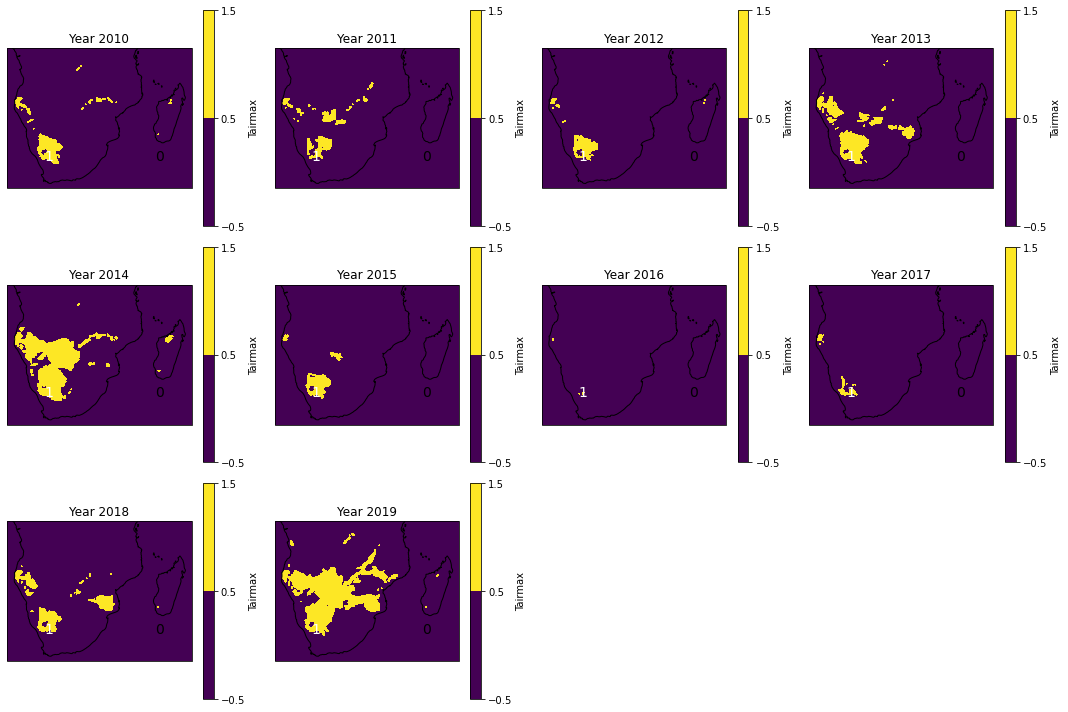

In [2]:


# Define the threshold temperature in Celsius
threshold_celsius = 34.5

# Convert Celsius to Kelvin
threshold_k = threshold_celsius + 273.15

# Specify the start and end years for the 10-year period
start_year = 2010
end_year = 2019

# Select the time period
subset = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))

# Initialize a list to store boolean maps for each year
boolean_maps = []

# Loop through each year
for year in range(start_year, end_year + 1):
    subset_year = subset.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Check if Tairmax is above the threshold
    above_threshold_year = subset_year['Tairmax'] > threshold_k

    # Calculate the count of occurrences exceeding the threshold over time
    count_over_threshold_year = above_threshold_year.sum(dim='time')

    # Create a boolean map based on the count criterion (1 if count > 56, 0 otherwise)
    boolean_map_year = count_over_threshold_year > 56

    # Append the boolean map to the list
    boolean_maps.append(boolean_map_year)

    # Print a message indicating whether the count is greater than 56 at any grid point
    if boolean_map_year.any():
        print(f'Year {year}: Count > 56 at {boolean_map_year.sum().item()} grid points')
    else:
        print(f'Year {year}: Count <= 56 at all grid points')

# Plot the boolean maps spatially
plt.figure(figsize=(15, 10))

for idx, year in enumerate(range(start_year, end_year + 1), 1):
    ax = plt.subplot(3, 4, idx, projection=ccrs.PlateCarree())
    
    # Plot boolean map
    contour = boolean_maps[idx - 1].plot.contourf(ax=ax, levels=[-0.5, 0.5, 1.5], cmap='viridis', transform=ccrs.PlateCarree())
    ax.coastlines()

    # Add annotation indicating color for 1 and 0
    plt.annotate('1', xy=(0.2, 0.2), xycoords='axes fraction', color='white', fontsize=14)
    plt.annotate('0', xy=(0.8, 0.2), xycoords='axes fraction', color='black', fontsize=14)

    plt.title(f'Year {year}')

plt.tight_layout()
plt.show()
